In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (299, 13)

First 5 rows:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  


In [3]:
print("\nDataset Info:")
print(df.info())
print("\nColumn Names:")
print(df.columns.tolist())
print("\nBasic Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
Non

In [4]:
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing values per column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Total missing values: 0


In [5]:
print("First 10 patients (age, ejection_fraction, DEATH_EVENT):")
print(df.iloc[:10, [0, 4, -1]])

high_creatinine = df.loc[df['creatinine_phosphokinase'] > 1000]
print(f"\nPatients with high creatinine (>1000): {len(high_creatinine)}")

First 10 patients (age, ejection_fraction, DEATH_EVENT):
    age  ejection_fraction  DEATH_EVENT
0  75.0                 20            1
1  55.0                 38            1
2  65.0                 20            1
3  50.0                 20            1
4  65.0                 20            1
5  90.0                 40            1
6  75.0                 15            1
7  60.0                 60            1
8  65.0                 65            1
9  80.0                 35            1

Patients with high creatinine (>1000): 36


In [6]:
df_sorted = df.sort_values('age', ascending=False)
print("Top 5 oldest patients:")
print(df_sorted[['age', 'sex', 'DEATH_EVENT']].head())

survival_groups = df.groupby('DEATH_EVENT')
print("\nSurvival Statistics:")
print(survival_groups['age'].agg(['mean', 'std', 'count']))

Top 5 oldest patients:
      age  sex  DEATH_EVENT
26   95.0    0            1
55   95.0    1            1
30   94.0    1            1
36   90.0    1            1
289  90.0    0            0

Survival Statistics:
                  mean        std  count
DEATH_EVENT                             
0            58.761906  10.637890    203
1            65.215281  13.214556     96


In [7]:
crosstab_sex_death = pd.crosstab(df['sex'], df['DEATH_EVENT'], margins=True)
print("Sex vs Death Event Crosstab:")
print(crosstab_sex_death)

crosstab_smoking_death = pd.crosstab(df['smoking'], df['DEATH_EVENT'], margins=True)
print("\nSmoking vs Death Event Crosstab:")
print(crosstab_smoking_death)

Sex vs Death Event Crosstab:
DEATH_EVENT    0   1  All
sex                      
0             71  34  105
1            132  62  194
All          203  96  299

Smoking vs Death Event Crosstab:
DEATH_EVENT    0   1  All
smoking                  
0            137  66  203
1             66  30   96
All          203  96  299


In [10]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
df['age_group'] = pd.cut(df['age'], bins=[0, 50, 65, 100], labels=['Young', 'Middle', 'Old'])
print("Age groups created:")
print(df['age_group'].value_counts())

df['ejection_fraction_category'] = pd.cut(df['ejection_fraction'], 
                                        bins=[0, 30, 50, 100], 
                                        labels=['Low', 'Normal', 'High'])
print("\nEjection fraction categories:")
print(df['ejection_fraction_category'].value_counts())

Age groups created:
age_group
Middle    136
Old        89
Young      74
Name: count, dtype: int64

Ejection fraction categories:
ejection_fraction_category
Normal    167
Low        93
High       39
Name: count, dtype: int64


C:\Users\Praveen SB Nair\AppData\Local\Temp\ipykernel_16152\3712372803.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_by_age = df.groupby('age_group')['DEATH_EVENT'].sum()


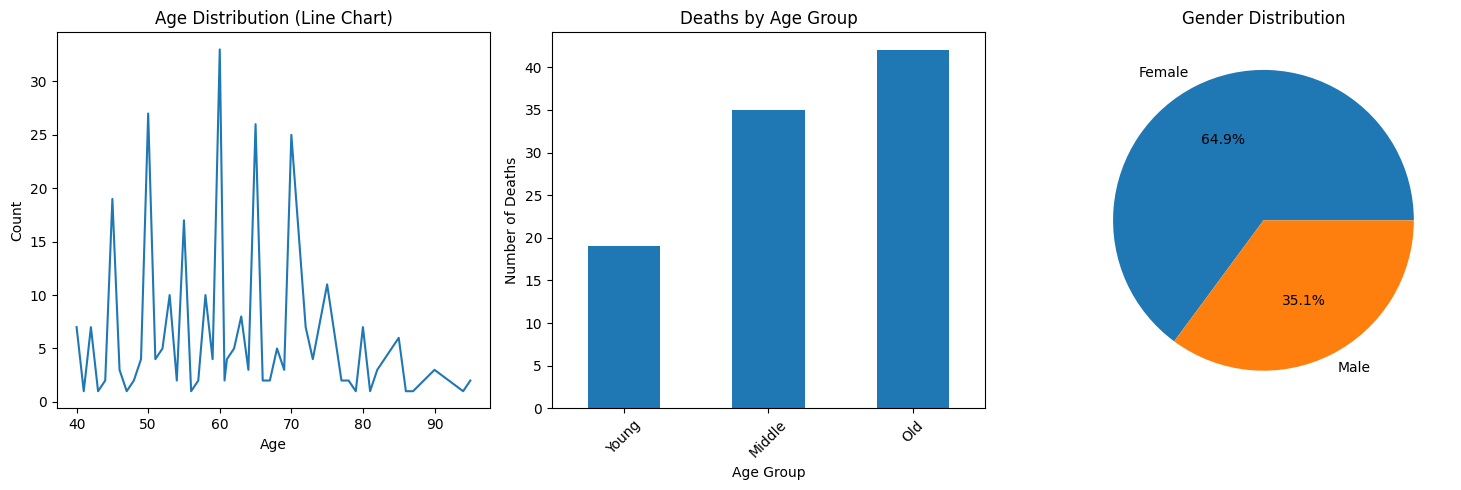

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
age_counts = df['age'].value_counts().sort_index()
plt.plot(age_counts.index, age_counts.values)
plt.title('Age Distribution (Line Chart)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
death_by_age = df.groupby('age_group')['DEATH_EVENT'].sum()
death_by_age.plot(kind='bar')
plt.title('Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts.values, labels=['Female', 'Male'], autopct='%1.1f%%')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

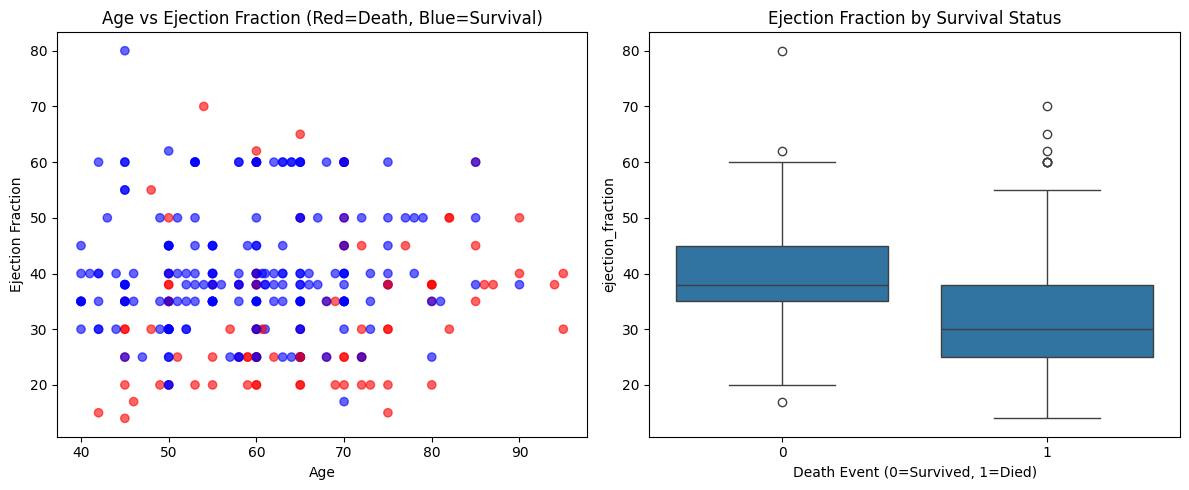

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['red' if x == 1 else 'blue' for x in df['DEATH_EVENT']]
plt.scatter(df['age'], df['ejection_fraction'], c=colors, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.title('Age vs Ejection Fraction (Red=Death, Blue=Survival)')

plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.title('Ejection Fraction by Survival Status')
plt.xlabel('Death Event (0=Survived, 1=Died)')

plt.tight_layout()
plt.show()

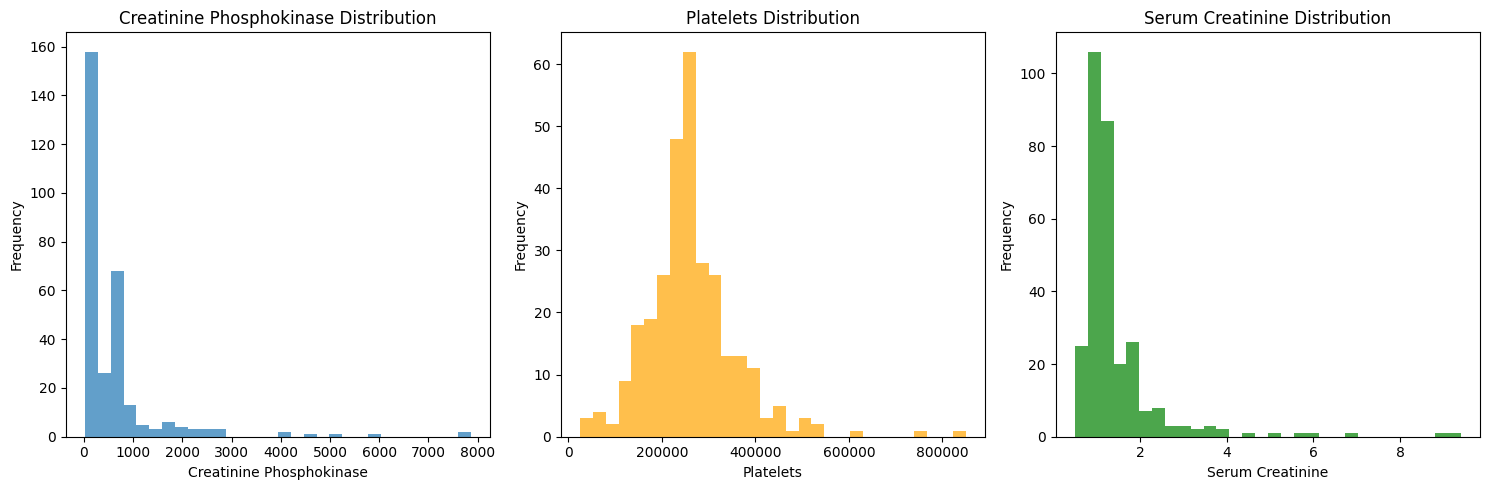

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['creatinine_phosphokinase'], bins=30, alpha=0.7)
plt.title('Creatinine Phosphokinase Distribution')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['platelets'], bins=30, alpha=0.7, color='orange')
plt.title('Platelets Distribution')
plt.xlabel('Platelets')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['serum_creatinine'], bins=30, alpha=0.7, color='green')
plt.title('Serum Creatinine Distribution')
plt.xlabel('Serum Creatinine')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()